In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import math
import warnings



UsageError: Line magic function `%` not found.


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.shape

(400, 5)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32

In [10]:
df1=df.drop('User ID', axis=1, inplace=True)



KeyError: "['User ID'] not found in axis"

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


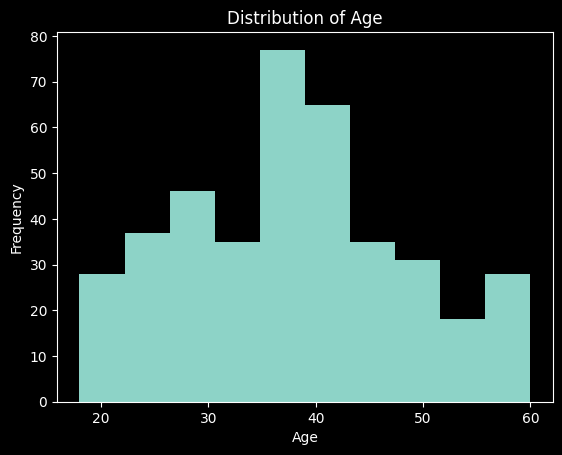

In [12]:
# Histogram
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

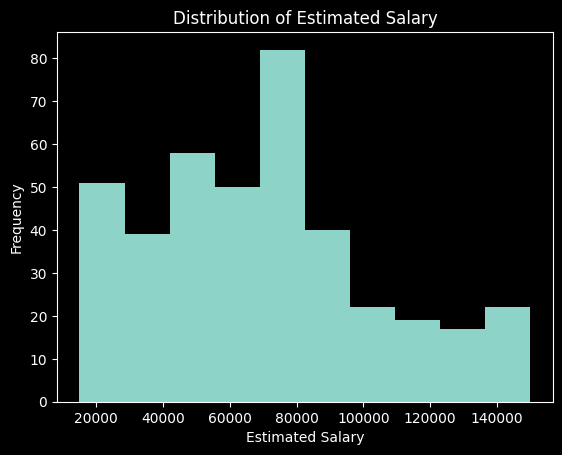

In [13]:
plt.hist(df['EstimatedSalary'])
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
plt.show()

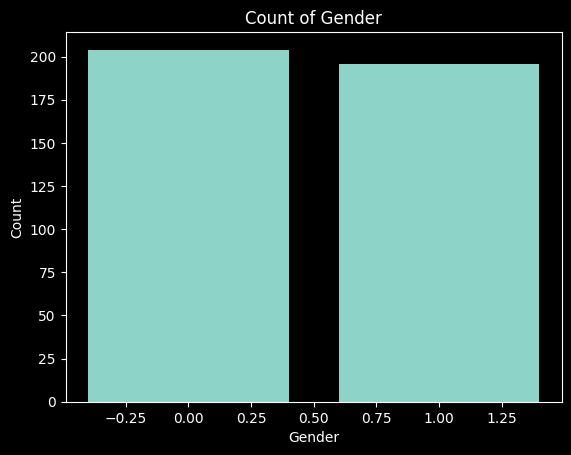

In [14]:
# Bar Chart
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()


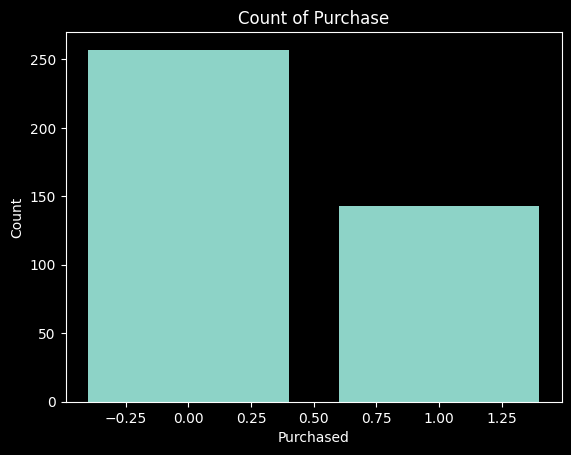

In [15]:
purchased_counts = df['Purchased'].value_counts()
plt.bar(purchased_counts.index, purchased_counts.values)
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Count of Purchase')
plt.show()


In [23]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


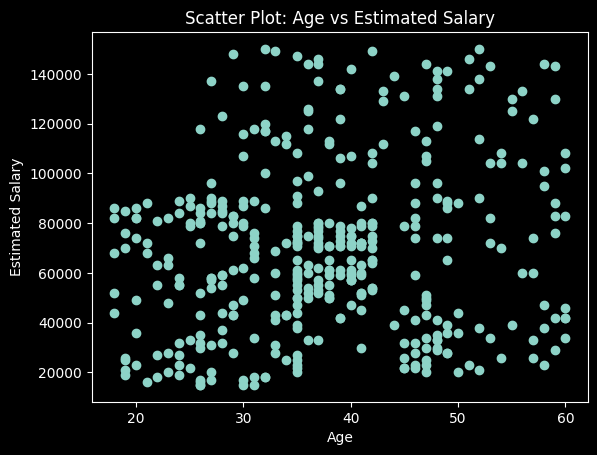

In [19]:
# Scatter Plot
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot: Age vs Estimated Salary')
plt.show()









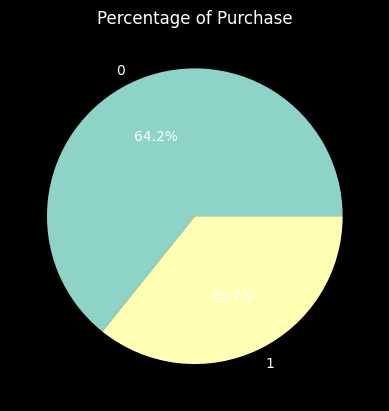

In [20]:
# Pie Chart
purchase_counts = df['Purchased'].value_counts()
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Purchase')
plt.show()


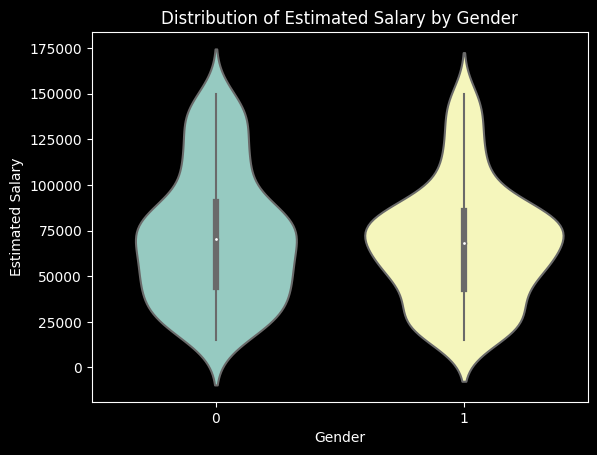

In [30]:
#violin plot
import seaborn as sns

sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary by Gender')
plt.show()

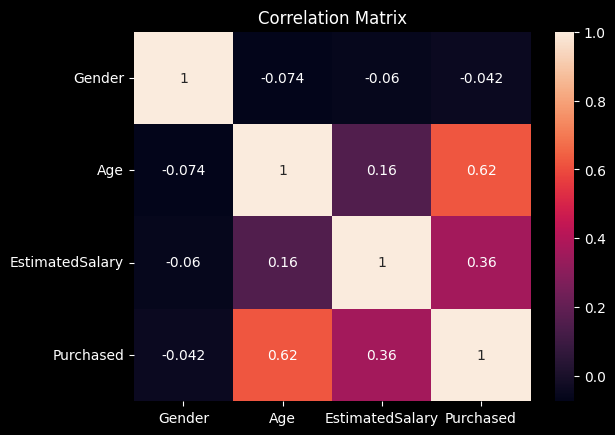

In [29]:
#heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

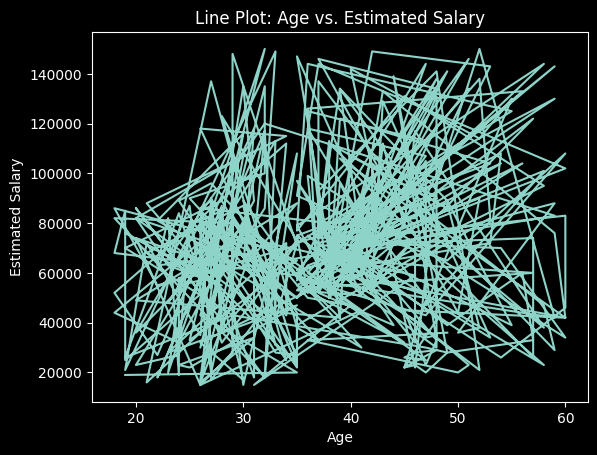

In [31]:
# Line Plot
plt.plot(df['Age'], df['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Line Plot: Age vs. Estimated Salary')
plt.show()

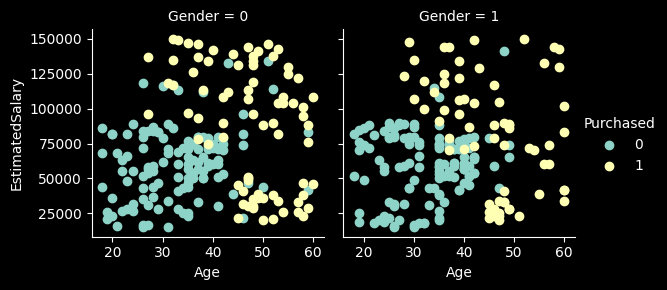

In [32]:
# Facet Grid: A facet grid allows you to create a grid of subplots based on categorical variables, enabling you to compare distributions or relationships across different categories.
g = sns.FacetGrid(df, col='Gender', hue='Purchased')
g.map(plt.scatter, 'Age', 'EstimatedSalary')
g.add_legend()
plt.show()

In [33]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


In [34]:
X=df.drop('Purchased', axis=1)
y=df['Purchased']

In [35]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

In [61]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (320, 3)
X_test (80, 3)
y_train (320,)
y_test (80,)


In [62]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report, accuracy_score
ac=accuracy_score(y_test, y_pred)
ac

0.925

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [69]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [70]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import classification_report, accuracy_score
ac=accuracy_score(y_test, y_pred)
ac

0.725

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



c:\Users\Muhammad Ammar Dogar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Muhammad Ammar Dogar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Muhammad Ammar Dogar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [72]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  0],
       [22,  0]], dtype=int64)

In [74]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [75]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [76]:
from sklearn.metrics import classification_report, accuracy_score
ac=accuracy_score(y_test, y_pred)
ac

0.575

In [77]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[37, 21],
       [13,  9]], dtype=int64)